In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving DigitalAd_dataset.csv to DigitalAd_dataset.csv


In [ ]:
dataset=pd.read_csv('DigitalAd_dataset.csv')

In [ ]:
print(dataset.shape)
print(dataset.head(5))

(400, 3)
   Age  Salary  Status
0   18   82000       0
1   29   80000       0
2   47   25000       1
3   45   26000       1
4   46   28000       1


In [ ]:
X=dataset.iloc[:,:-1].values
X

array([[    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],
       [    27,  17000],
       [    33,  51000],
       [    35, 108000],
       [    30,  15000],
       [    28,  84000],
       [    23,  20000],
       [    25,  79000],
       [    27,  54000],
       [    30, 135000],
       [    31,  89000],
       [    24,  32000],
       [    18,  44000],
       [    29,  83000],
       [    35,  23000],


In [ ]:
Y=dataset.iloc[:,-1].values
Y

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train= sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)
model=model.fit(X_train,Y_train)

In [ ]:
age =int (input("enter the age of the customer"))
salary =int (input("enter the salary of  customner"))
newcust=[[age,salary]]
result=model.predict(sc.transform(newcust))
if result==1:
  print ("will  buy")
else:
  print ("will not buy")

enter the age of the customer25
enter the salary of  customner50000
will not buy


In [ ]:
y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(Y_test, y_pred)
print("confusion matrix:")
print(cm)
print("acc of the model:{0}%".format(accuracy_score(Y_test,y_pred)*100))

confusion matrix:
[[61  0]
 [20 19]]
acc of the model:80.0%


no skill:ROC AUC=50.000
LR skill:ROC AUC=92.980


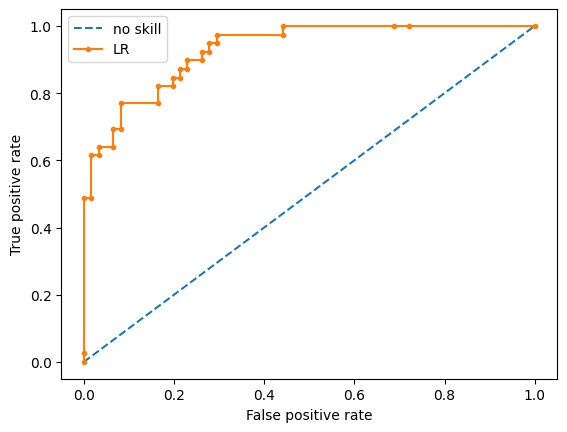

In [ ]:
#ROC CURVE
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
nsprobability=[0 for _ in range (len(Y_test))] # to draw the basic line which will mark the area
isprobability=model.predict_proba(X_test)
isprobability=isprobability[:,1]#keeps only positive outcome values i.e the customers where they buy the product
#calculating scores
nsauc=roc_auc_score(Y_test,nsprobability)
lrauc=roc_auc_score(Y_test,isprobability)
#summarising scores
print("no skill:ROC AUC=%.3f"%(nsauc*100))
print("LR skill:ROC AUC=%.3f"%(lrauc*100))
# calculating roc curve
nsFP,nsTP,_=roc_curve(Y_test,nsprobability)# the underscore is because roc returns three values FPR,TPR and a thresholds which we dont need
lrFP,lrTP,_=roc_curve(Y_test,isprobability)
#plotting ROC curve
plt.plot(nsFP,nsTP,linestyle='--',label='no skill')
plt.plot(lrFP,lrTP,marker='.',label='LR')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()

In [ ]:
#cross validation score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold=KFold(n_splits=10,random_state=100,shuffle=True)
result=cross_val_score(model,X_train,Y_train,cv=kfold)
print("cross validTION SCORE%.2f%%"%(result.mean()*100))

cross validTION SCORE84.50%


In [ ]:
#stratified K-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skFold=StratifiedKFold(n_splits=10,random_state=100,shuffle=True)
model_skfold=LogisticRegression()
result_skfold=cross_val_score(model_skfold,X,Y,cv=skFold)
print("Stratified Kfold Cross validation score is:%.2f%%"%(result_skfold.mean()*100))

Stratified Kfold Cross validation score is:84.75%


In [ ]:
#CAP curve
